# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please use caution when interpreting the code or results. ⚠️**

This notebook demonstrates how to explore and analyze data from the Allen Institute's Vision2Hippocampus project, which investigates how visual representations evolve from the thalamus through the visual cortex and ultimately to the hippocampus in the mouse brain.

## Overview

The Vision2Hippocampus project aims to understand how neural representations of simple and natural visual stimuli evolve from the lateral geniculate nucleus (LGN) through primary visual cortex (V1), higher-order visual areas, and through to the hippocampus. Using Neuropixel probes, researchers recorded neural activity across these regions while mice were presented with various visual stimuli, including moving bars of light and natural movies featuring eagles and other animals.

Dandiset Link: [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

This notebook will demonstrate:
1. How to access and load data from the Dandiset
2. How to explore the metadata and structure of NWB files
3. How to visualize behavioral data (eye tracking, running)
4. How to visualize neural data (LFP signals)
5. How to correlate neural activity with stimulus presentations

## Required Packages

This notebook requires the following Python packages:

In [1]:
# Core data handling and scientific packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
sns.set_theme()

# Neurophysiology-specific packages
import pynwb
import h5py
import remfile
from itertools import islice

# Optional - progress indicator for data loading
from tqdm.notebook import tqdm

# For interactive plots
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

## Loading a Dandiset

We'll use the DANDI API to access the Dandiset. First, let's connect to the DANDI archive and get information about the dataset:

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away fr...

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-6920

## Exploring an NWB File

Let's load one of the NWB files from the dataset. We'll examine the main session file for subject 692072 to understand its structure and contents.

In [3]:
# Define the URL for the NWB file
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
print(f"Loading NWB file from URL: {url}")

# Open the remote file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)

# Create an NWB file reader
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the file
print(f"Session ID: {nwb.session_id}")
print(f"Experiment date: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject species: {nwb.subject.species}")

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1298465622
Experiment date: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Subject age: P82D
Subject species: Mus musculus


## Structure of the NWB File

The NWB file contains multiple types of data organized into various groups. Here's a summary of the main components:

### Subject Information
- Subject ID: 692072
- Species: Mus musculus
- Age: P82D (82 days post-birth)
- Sex: Male
- Genotype: wt/wt
- Strain: Transgenic

### Acquisition Data
- Eye tracking measurements
  - Pupil tracking
  - Corneal reflection tracking
  - Blink detection
- Running wheel measurements
  - Raw rotation data
  - Signal and supply voltage

### Processing Modules
- Running speed calculations
- Stimulus timing information

### Neural Recording Data
- Multiple Neuropixel probes (A, B, E, F)
- Electrode location information
- Spike and LFP data

### Stimulus Information
- Visual stimulus presentations
  - Moving bars with various parameters
  - Natural movies (eagles, snakes, etc.)

### Units Data
- Sorted spike data for individual neurons
- Quality metrics for each unit

Let's explore the Neurosift link for this NWB file:

In [4]:
neurosift_url = f"https://neurosift.app/nwb?url={url}&dandisetId=000690&dandisetVersion=0.250326.0015"
print(f"Explore this file in Neurosift: {neurosift_url}")

Explore this file in Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=0.250326.0015


## Examining Behavioral Data: Eye Tracking

Let's visualize some of the eye tracking data from the session:

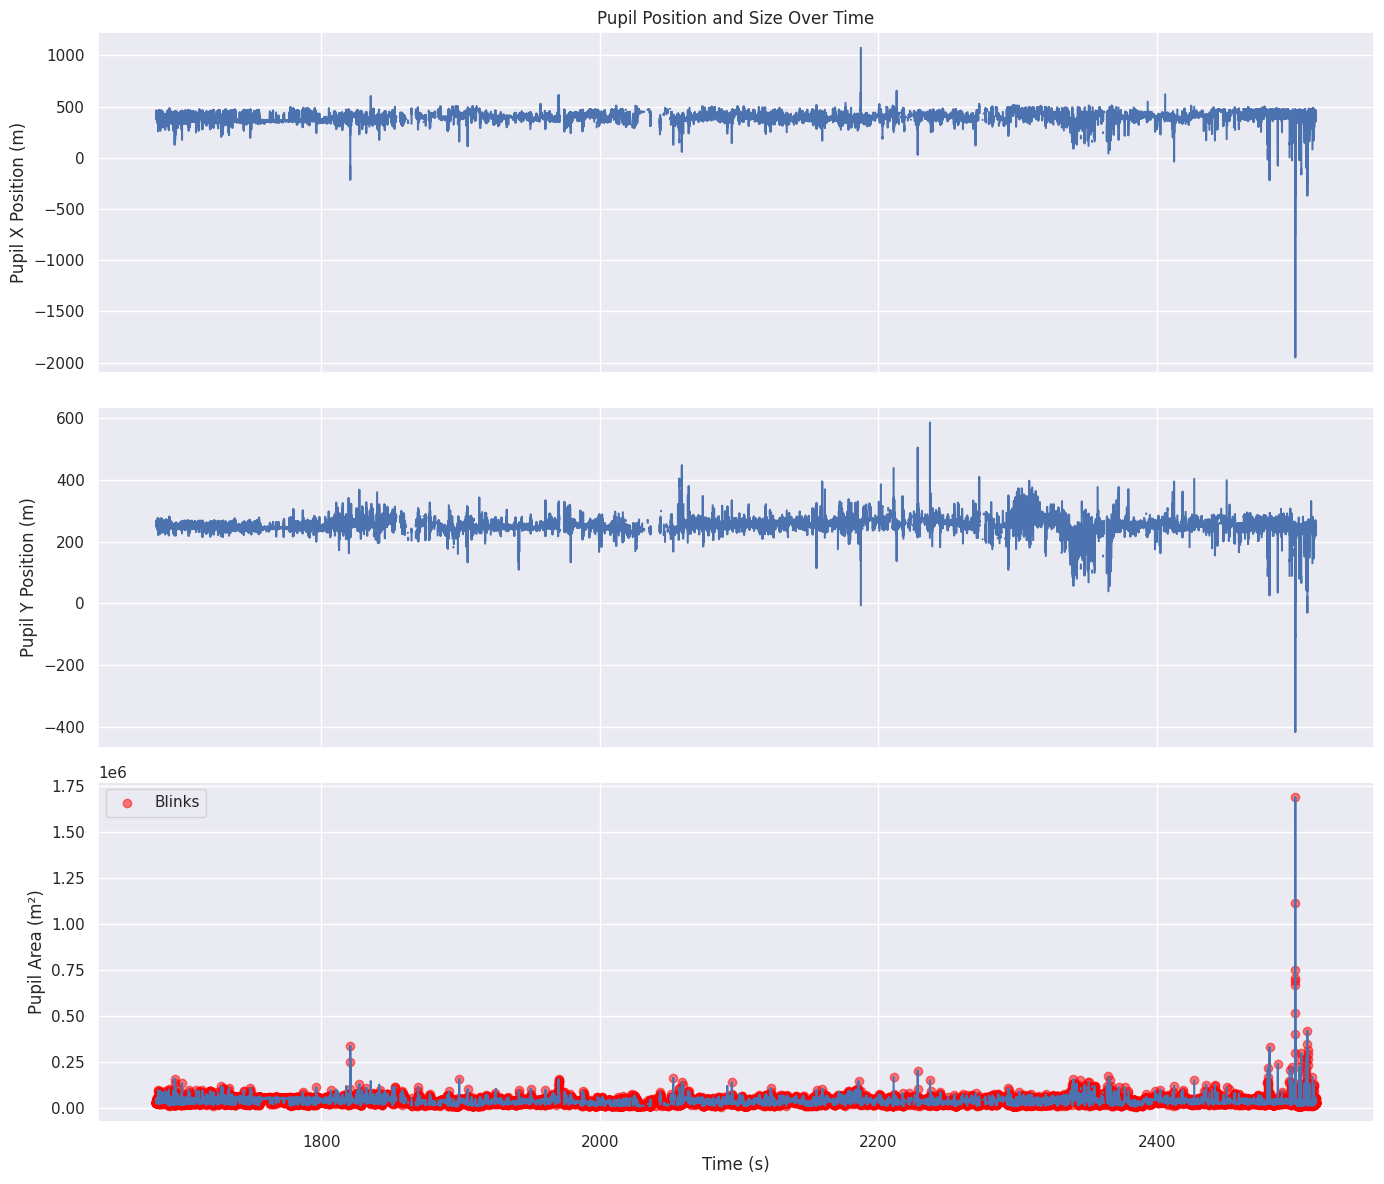

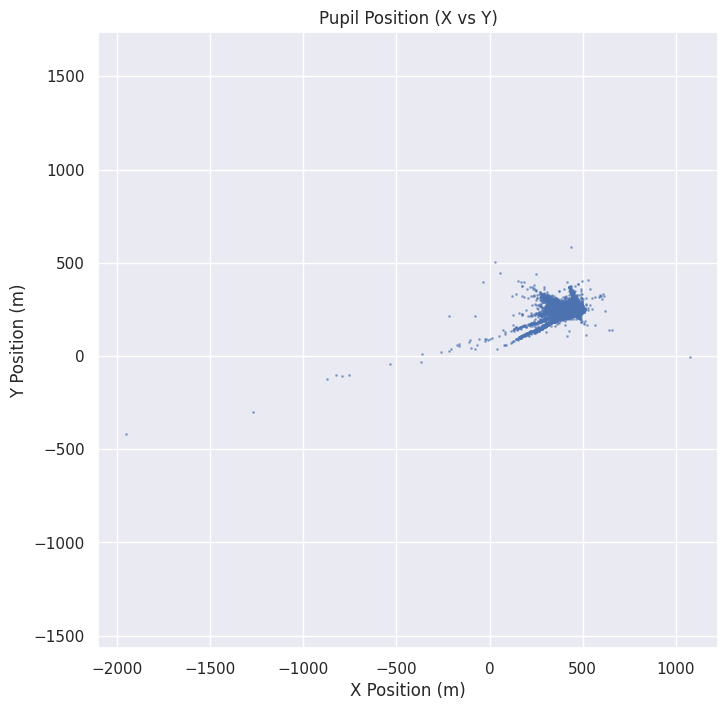

In [5]:
# Get eye tracking data
eye_tracking = nwb.acquisition['EyeTracking'].eye_tracking

# Extract pupil data and timestamps - we'll take a subset for visualization
num_samples = 50000  # ~1-2 minutes of data
start_idx = 100000   # Skip the first portion

timestamps = eye_tracking.timestamps[start_idx:start_idx+num_samples]
pupil_x = eye_tracking.data[start_idx:start_idx+num_samples, 0]
pupil_y = eye_tracking.data[start_idx:start_idx+num_samples, 1]
pupil_area = eye_tracking.area[start_idx:start_idx+num_samples]
blink_data = nwb.acquisition['EyeTracking'].likely_blink.data[start_idx:start_idx+num_samples]

# Plot pupil position over time
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Pupil X position
axes[0].plot(timestamps, pupil_x)
axes[0].set_ylabel('Pupil X Position (m)')
axes[0].set_title('Pupil Position and Size Over Time')

# Pupil Y position
axes[1].plot(timestamps, pupil_y)
axes[1].set_ylabel('Pupil Y Position (m)')

# Pupil area with blinks highlighted
axes[2].plot(timestamps, pupil_area)
# Highlight blinks
blink_timestamps = timestamps[blink_data]
blink_areas = pupil_area[blink_data]
axes[2].scatter(blink_timestamps, blink_areas, color='red', alpha=0.5, label='Blinks')
axes[2].set_ylabel('Pupil Area (m²)')
axes[2].set_xlabel('Time (s)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Plot pupil position (X vs Y)
plt.figure(figsize=(8, 8))
plt.scatter(pupil_x, pupil_y, s=1, alpha=0.5)
plt.title('Pupil Position (X vs Y)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.axis('equal')
plt.grid(True)
plt.show()

## Examining Behavioral Data: Running Speed

Next, let's look at the mouse's running behavior during the experiment:

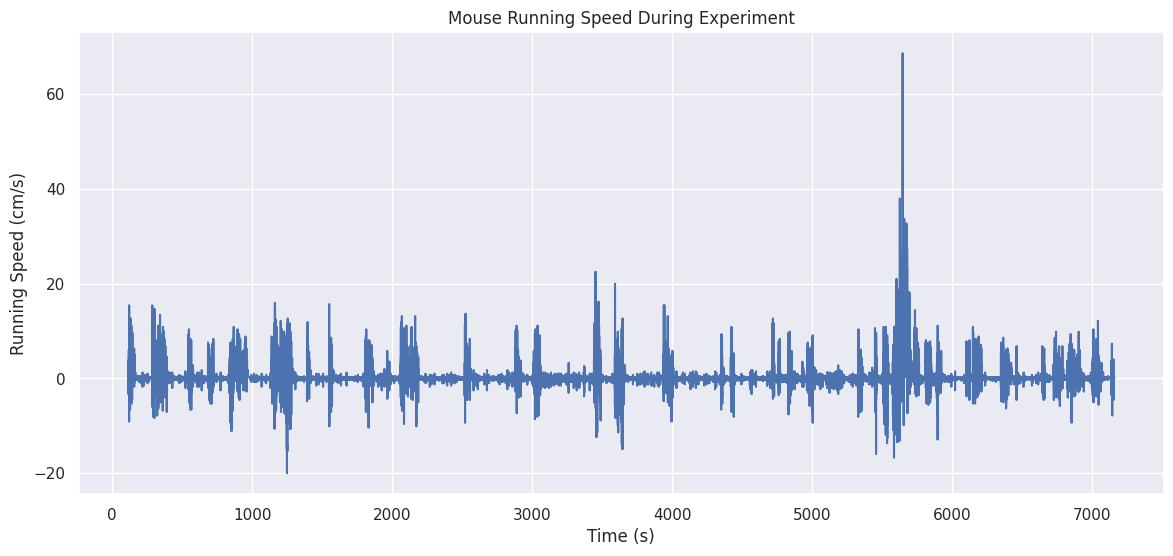

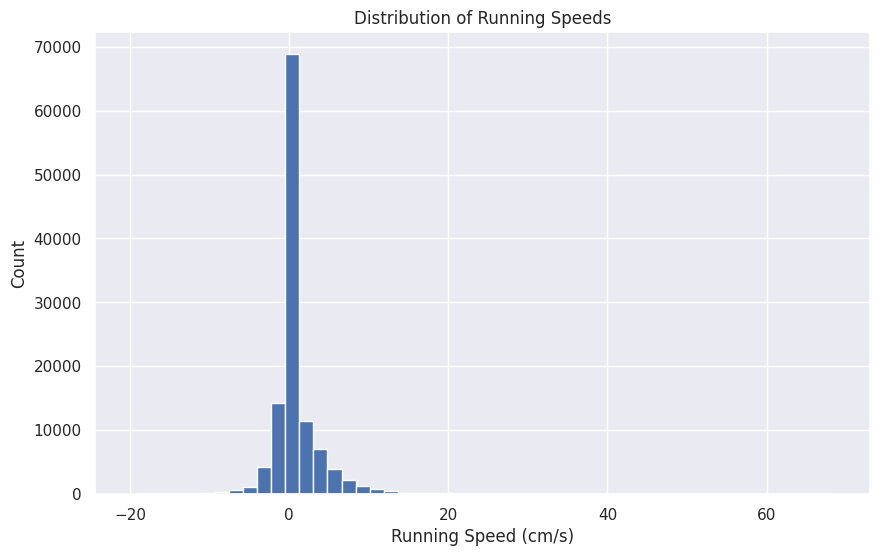

In [6]:
# Get running speed data
running_speed = nwb.processing['running'].data_interfaces['running_speed']
running_timestamps = running_speed.timestamps[:]
running_data = running_speed.data[:]

# Plot running speed over time
plt.figure(figsize=(14, 6))
plt.plot(running_timestamps, running_data)
plt.ylabel('Running Speed (cm/s)')
plt.xlabel('Time (s)')
plt.title('Mouse Running Speed During Experiment')
plt.grid(True)
plt.show()

# Create a histogram of running speeds
plt.figure(figsize=(10, 6))
plt.hist(running_data, bins=50)
plt.xlabel('Running Speed (cm/s)')
plt.ylabel('Count')
plt.title('Distribution of Running Speeds')
plt.grid(True)
plt.show()

## Exploring Stimulus Presentations

The experiment presented various visual stimuli to the mouse. Let's look at the timing and properties of these stimuli:

Stimulus: SAC_Wd15_Vel2_Bndry1_Cntst0_loop
Number of presentations: 28800

First 5 presentations:
    start_time   stop_time                     stimulus_name  stimulus_block  \
id                                                                             
0   113.102930  113.119610  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
1   113.119610  113.136289  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
2   113.136289  113.152969  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
3   113.152969  113.169648  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   
4   113.169648  113.186328  SAC_Wd15_Vel2_Bndry1_Cntst0_loop             0.0   

    frame            color  contrast  opacity  orientation              size  \
id                                                                             
0     0.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   
1     1.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   
2     2.0  [1.0, 1.0,

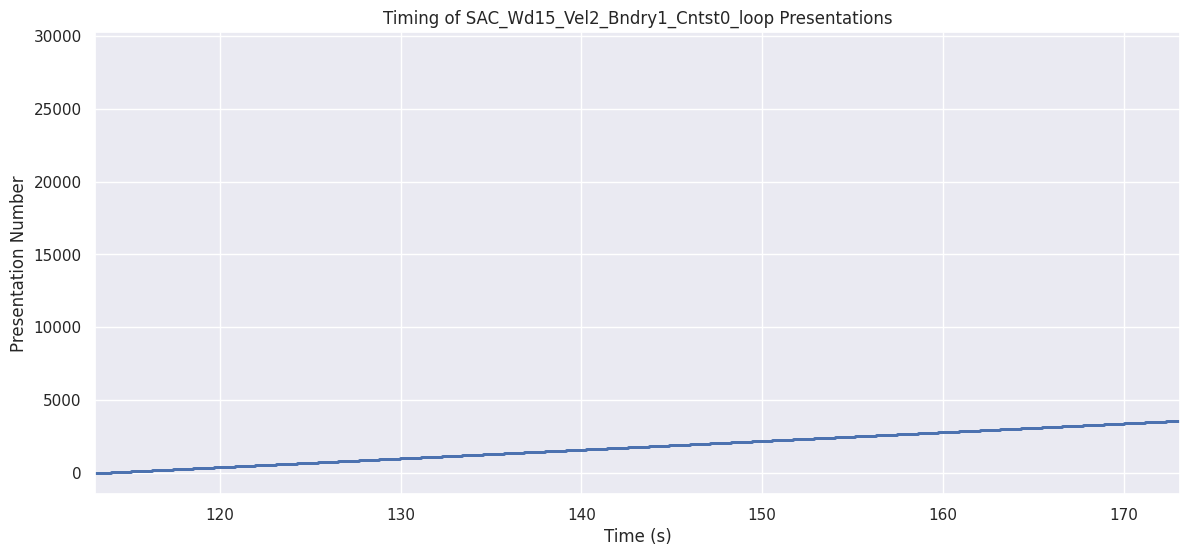

In [7]:
# Let's examine one of the stimulus presentation intervals
stim_name = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop'
stim_intervals = nwb.intervals[f'{stim_name}_presentations'].to_dataframe()

print(f"Stimulus: {stim_name}")
print(f"Number of presentations: {len(stim_intervals)}")
print("\nFirst 5 presentations:")
print(stim_intervals.head())

# Plot timing of stimulus presentations
plt.figure(figsize=(14, 6))
for i, (_, row) in enumerate(stim_intervals.iterrows()):
    plt.plot([row['start_time'], row['stop_time']], [i, i], 'b-', linewidth=2)
    
plt.title(f'Timing of {stim_name} Presentations')
plt.xlabel('Time (s)')
plt.ylabel('Presentation Number')
plt.grid(True)
plt.xlim(stim_intervals['start_time'].min(), stim_intervals['start_time'].min() + 60)  # Show first 60 seconds
plt.show()

Let's examine multiple stimulus types to understand the experiment design:

In [8]:
# Get list of all stimulus intervals
stim_interval_names = [name for name in nwb.intervals.keys() if 'presentations' in name]
print(f"Available stimulus types: {len(stim_interval_names)}")

# Print information about each stimulus type
for stim_interval_name in stim_interval_names[:5]:  # First 5 for brevity
    stim_type = stim_interval_name.replace('_presentations', '')
    stim_df = nwb.intervals[stim_interval_name].to_dataframe()
    
    print(f"\nStimulus: {stim_type}")
    print(f"  Number of presentations: {len(stim_df)}")
    print(f"  First presentation at: {stim_df['start_time'].min():.2f}s")
    print(f"  Last presentation at: {stim_df['stop_time'].max():.2f}s")
    print(f"  Duration: {stim_df['stop_time'].max() - stim_df['start_time'].min():.2f}s")

# Let's decode the stimulus names to understand the experiment better
print("\nStimulus naming convention:")
print("SAC: Standard bar stimulus (usually white bar on black background)")
print("Wd15: Width 15 degrees")
print("Vel2: Velocity covering screen width in 2 seconds")
print("Bndry1: Boundary condition type 1 (standard boundary)")
print("Cntst0: Standard contrast (white bar on black)")
print("loop: Stimulus repeats (loops) through the visual field")

Available stimulus types: 20



Stimulus: Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop
  Number of presentations: 28800
  First presentation at: 4514.84s
  Last presentation at: 4995.24s
  Duration: 480.40s



Stimulus: Disk_Wd15_Vel2_Bndry1_Cntst0_loop
  Number of presentations: 14400
  First presentation at: 3794.23s
  Last presentation at: 4034.44s
  Duration: 240.20s



Stimulus: GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop
  Number of presentations: 14400
  First presentation at: 4274.64s
  Last presentation at: 4514.84s
  Duration: 240.20s



Stimulus: Ring_Wd15_Vel2_Bndry1_Cntst0_loop
  Number of presentations: 28800
  First presentation at: 3313.83s
  Last presentation at: 3794.23s
  Duration: 480.40s



Stimulus: SAC_Wd15_Vel2_Bndry1_Cntst0_loop
  Number of presentations: 28800
  First presentation at: 113.10s
  Last presentation at: 593.54s
  Duration: 480.44s

Stimulus naming convention:
SAC: Standard bar stimulus (usually white bar on black background)
Wd15: Width 15 degrees
Vel2: Velocity covering screen width in 2 seconds
Bndry1: Boundary condition type 1 (standard boundary)
Cntst0: Standard contrast (white bar on black)
loop: Stimulus repeats (loops) through the visual field


## Loading a Probe-Specific NWB File

Let's load electrophysiology data from one of the probes to examine neural activity.

In [9]:
# Define the URL for the probe NWB file - we're using probe 0 from the same session
probe_url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
print(f"Loading probe NWB file from URL: {probe_url}")

# Open the remote file
probe_remote_file = remfile.File(probe_url)
probe_h5_file = h5py.File(probe_remote_file)

# Create an NWB file reader
probe_io = pynwb.NWBHDF5IO(file=probe_h5_file)
probe_nwb = probe_io.read()

# Print basic information about the file
print(f"Session ID: {probe_nwb.session_id}")
print(f"Probe identifier: {probe_nwb.identifier}")

# Get information about the electrodes 
electrode_df = probe_nwb.electrodes.to_dataframe()
print(f"\nNumber of electrodes: {len(electrode_df)}")

# Show electrode information
print("\nElectrode information:")
print(electrode_df.head())

Loading probe NWB file from URL: https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1298465622
Probe identifier: 0

Number of electrodes: 95

Electrode information:
   location                                              group group_name  \
id                                                                          
2        PF  probeA abc.EcephysElectrodeGroup at 0x12983309...     probeA   
6        TH  probeA abc.EcephysElectrodeGroup at 0x12983309...     probeA   
10       TH  probeA abc.EcephysElectrodeGroup at 0x12983309...     probeA   
14       TH  probeA abc.EcephysElectrodeGroup at 0x12983309...     probeA   
18       LP  probeA abc.EcephysElectrodeGroup at 0x12983309...     probeA   

    probe_vertical_position  probe_horizontal_position  probe_id  local_index  \
id                                                                              
2                        40                         59         0            2   
6                        80                         59         0            6   
10                      120                

## Examining LFP Data

Let's visualize LFP (Local Field Potential) data from the probe:

LFP channels: 95
LFP sampling rate: 1250.0 Hz


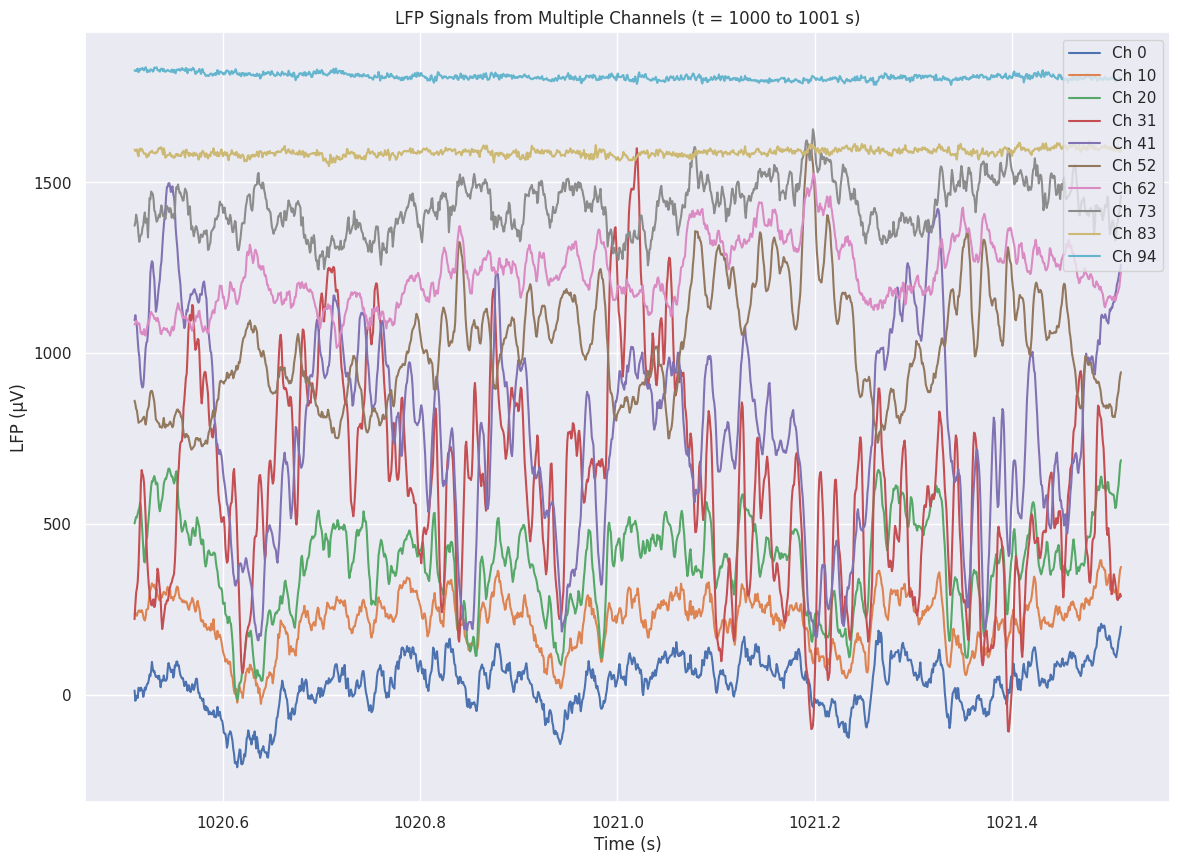

In [10]:
# Get LFP data
lfp = probe_nwb.acquisition['probe_0_lfp_data']

# Extract information
num_channels = lfp.data.shape[1]
sampling_rate = 1250.0  # from file metadata
print(f"LFP channels: {num_channels}")
print(f"LFP sampling rate: {sampling_rate} Hz")

# Select a small time window for visualization (1 second of data)
start_time = 1000  # seconds from recording start
duration = 1  # seconds
start_idx = int(start_time * sampling_rate)
end_idx = int((start_time + duration) * sampling_rate)

# Load a subset of LFP data for multiple channels
channel_indices = np.linspace(0, num_channels-1, 10, dtype=int)  # Select 10 channels evenly spaced
lfp_data = lfp.data[start_idx:end_idx, channel_indices]
lfp_timestamps = lfp.timestamps[start_idx:end_idx]

# Plot LFP data
plt.figure(figsize=(14, 10))
for i, channel_idx in enumerate(channel_indices):
    # Scale and offset for visualization
    offset = i * 200  # μV offset between channels
    plt.plot(lfp_timestamps, lfp_data[:, i] * 1e6 + offset, label=f'Ch {channel_idx}')

plt.xlabel('Time (s)')
plt.ylabel('LFP (μV)')
plt.title(f'LFP Signals from Multiple Channels (t = {start_time} to {start_time + duration} s)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Visualizing LFP as a Heatmap Across Channels

Let's create a heatmap to visualize LFP activity across all channels and see how it changes over time:

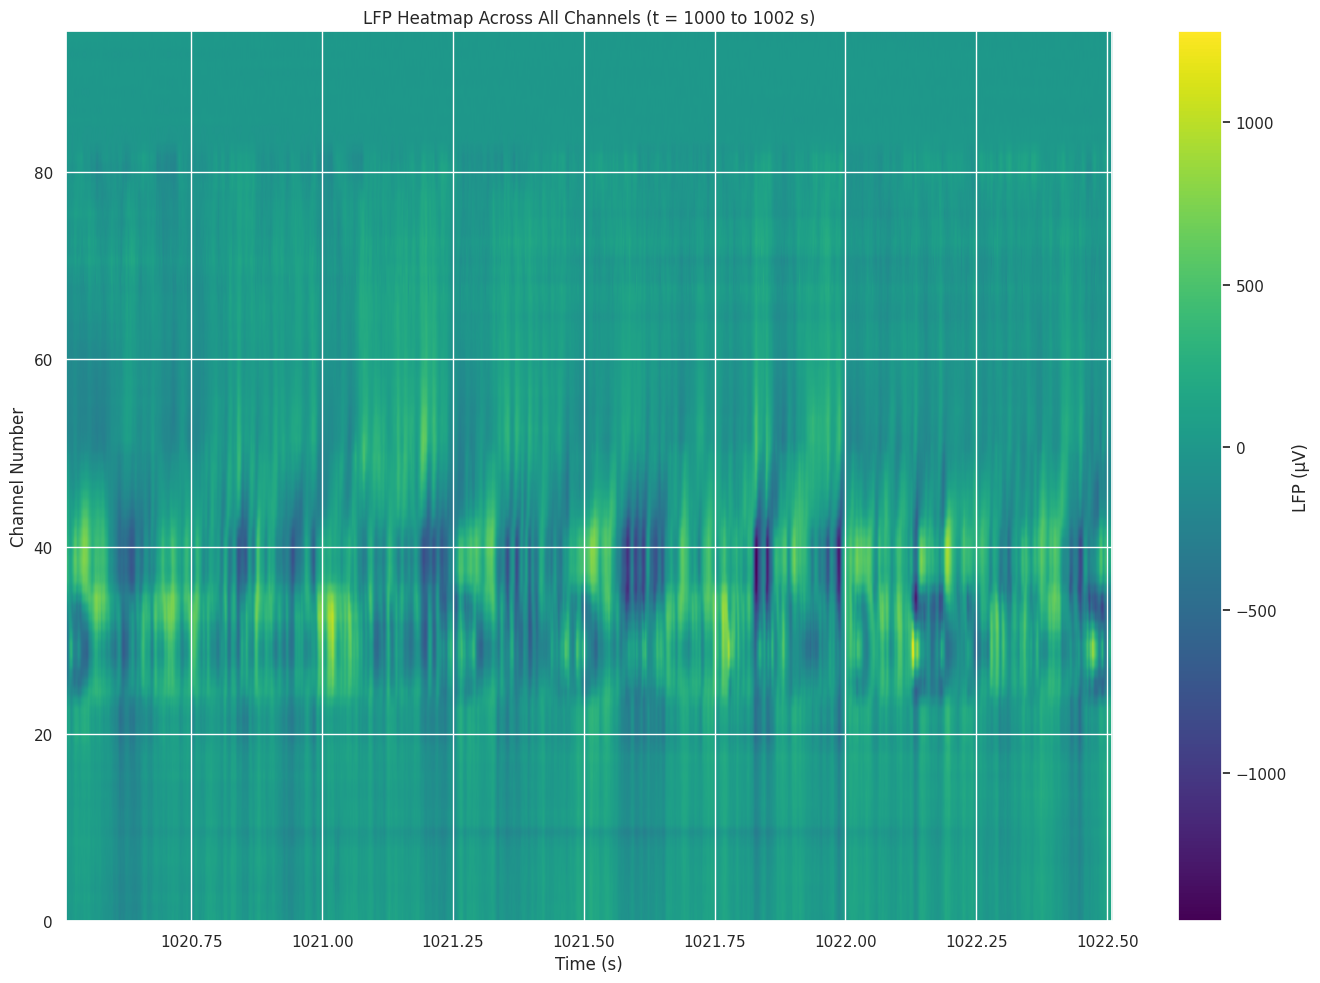

In [11]:
# Load a subset of LFP data for all channels
# We'll look at a slightly longer period
start_time = 1000  # seconds
duration = 2  # seconds
start_idx = int(start_time * sampling_rate)
end_idx = int((start_time + duration) * sampling_rate)

# Load data for all channels
lfp_data_all = lfp.data[start_idx:end_idx, :]
lfp_timestamps_subset = lfp.timestamps[start_idx:end_idx]

# Create a heatmap
plt.figure(figsize=(14, 10))
# Convert to μV for better visualization
im = plt.imshow(lfp_data_all.T * 1e6, 
                aspect='auto', 
                origin='lower',
                extent=[lfp_timestamps_subset[0], lfp_timestamps_subset[-1], 0, num_channels],
                cmap='viridis')

plt.colorbar(im, label='LFP (μV)')
plt.xlabel('Time (s)')
plt.ylabel('Channel Number')
plt.title(f'LFP Heatmap Across All Channels (t = {start_time} to {start_time + duration} s)')
plt.tight_layout()
plt.show()

## Correlating Neural Activity with Stimuli

Let's examine how LFP signals correlate with the visual stimuli by looking at LFP activity during specific stimulus presentations:

In [12]:
# First, let's find a stimulus presentation
stim_name = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop'  # Standard bar stimulus
stim_df = nwb.intervals[f'{stim_name}_presentations'].to_dataframe()

# Find a stimulus presentation that's at least 1 second long
valid_stims = stim_df[(stim_df['stop_time'] - stim_df['start_time']) >= 1.0]
if len(valid_stims) > 0:
    stim_row = valid_stims.iloc[100]  # Pick one from the middle of the experiment
    stim_start = stim_row['start_time']
    stim_end = stim_row['stop_time']
    
    print(f"Selected stimulus presentation:")
    print(f"  Start time: {stim_start:.2f}s")
    print(f"  End time: {stim_end:.2f}s")
    print(f"  Duration: {stim_end - stim_start:.2f}s")
    
    # Get LFP data during the stimulus
    stim_start_idx = int(stim_start * sampling_rate)
    stim_end_idx = int(stim_end * sampling_rate)
    
    # Include data from before and after stimulus for comparison
    before_duration = 0.5  # seconds before stimulus
    after_duration = 0.5   # seconds after stimulus
    before_start_idx = int((stim_start - before_duration) * sampling_rate)
    after_end_idx = int((stim_end + after_duration) * sampling_rate)
    
    # Make sure we don't go out of bounds
    before_start_idx = max(before_start_idx, 0)
    after_end_idx = min(after_end_idx, len(lfp.timestamps))
    
    # Load data for selected channels
    selected_channels = np.linspace(0, num_channels-1, 5, dtype=int)  # 5 evenly spaced channels
    lfp_during_stim = lfp.data[before_start_idx:after_end_idx, selected_channels]
    timestamps_during_stim = lfp.timestamps[before_start_idx:after_end_idx]
    
    # Plot LFP during stimulus
    plt.figure(figsize=(14, 10))
    for i, channel_idx in enumerate(selected_channels):
        # Scale and offset for visualization
        offset = i * 200  # μV offset between channels
        plt.plot(timestamps_during_stim, lfp_during_stim[:, i] * 1e6 + offset, label=f'Ch {channel_idx}')
    
    # Add vertical lines for stimulus onset and offset
    plt.axvline(x=stim_start, color='r', linestyle='--', label='Stimulus onset')
    plt.axvline(x=stim_end, color='g', linestyle='--', label='Stimulus offset')
    
    plt.xlabel('Time (s)')
    plt.ylabel('LFP (μV)')
    plt.title(f'LFP Signals During {stim_name} Stimulus')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    
    # Create a heatmap of all channels during the stimulus
    lfp_all_channels = lfp.data[before_start_idx:after_end_idx, :]
    
    plt.figure(figsize=(14, 10))
    im = plt.imshow(lfp_all_channels.T * 1e6, 
                    aspect='auto', 
                    origin='lower',
                    extent=[timestamps_during_stim[0], timestamps_during_stim[-1], 0, num_channels],
                    cmap='viridis')
    
    # Add vertical lines for stimulus onset and offset
    plt.axvline(x=stim_start, color='r', linestyle='--', label='Stimulus onset')
    plt.axvline(x=stim_end, color='g', linestyle='--', label='Stimulus offset')
    
    plt.colorbar(im, label='LFP (μV)')
    plt.xlabel('Time (s)')
    plt.ylabel('Channel Number')
    plt.title(f'LFP Heatmap During {stim_name} Stimulus')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
else:
    print("No suitable stimulus presentations found.")

No suitable stimulus presentations found.


## LFP Power Spectrum Analysis

Let's analyze the frequency components of the LFP signals during different stimulus conditions:

In [13]:
from scipy import signal

def compute_power_spectrum(lfp_data, fs, nperseg=1024):
    """Compute the power spectrum of LFP data."""
    freqs, psd = signal.welch(lfp_data, fs=fs, nperseg=nperseg, axis=0)
    return freqs, psd

# Select a channel to analyze
channel_idx = 50  # Middle channel

# Compute power spectrum during the stimulus
fs = sampling_rate  # sampling frequency in Hz
freqs_during, psd_during = compute_power_spectrum(lfp_during_stim[:, 0], fs)

# Also compute power spectrum for a baseline period (before stimulus)
baseline_duration = 2.0  # seconds
baseline_start_time = max(0, stim_start - 10)  # 10 seconds before stimulus
baseline_start_idx = int(baseline_start_time * sampling_rate)
baseline_end_idx = int((baseline_start_time + baseline_duration) * sampling_rate)

lfp_baseline = lfp.data[baseline_start_idx:baseline_end_idx, selected_channels[0]]
freqs_baseline, psd_baseline = compute_power_spectrum(lfp_baseline, fs)

# Plot power spectra
plt.figure(figsize=(12, 6))
plt.semilogy(freqs_baseline, psd_baseline, label='Baseline')
plt.semilogy(freqs_during, psd_during, label='During stimulus')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title(f'LFP Power Spectrum - Channel {selected_channels[0]}')
plt.xlim(0, 100)  # Focus on 0-100 Hz range
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'lfp_during_stim' is not defined

## Combined Visualization: Running, Eye Position, and Neural Activity

Finally, let's create a combined visualization that shows how running speed, eye position, and LFP activity correlate during stimulus presentation:

In [14]:
# Find timestamps that overlap between all datasets
# Let's use the same stimulus period as before

# Get running speed during this period
running_mask = (running_timestamps >= timestamps_during_stim[0]) & (running_timestamps <= timestamps_during_stim[-1])
running_timestamps_subset = running_timestamps[running_mask]
running_data_subset = running_data[running_mask]

# Get eye tracking data
eye_mask = (eye_tracking.timestamps >= timestamps_during_stim[0]) & (eye_tracking.timestamps <= timestamps_during_stim[-1])
eye_timestamps_subset = eye_tracking.timestamps[eye_mask]
pupil_x_subset = eye_tracking.data[eye_mask, 0]
pupil_area_subset = eye_tracking.area[eye_mask]

# Create a multi-panel figure
fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)

# Plot running speed
axes[0].plot(running_timestamps_subset, running_data_subset)
axes[0].set_ylabel('Running Speed (cm/s)')
axes[0].set_title('Behavior and Neural Activity During Visual Stimulus')

# Plot eye position (X)
axes[1].plot(eye_timestamps_subset, pupil_x_subset)
axes[1].set_ylabel('Pupil X Position (m)')

# Plot pupil area
axes[2].plot(eye_timestamps_subset, pupil_area_subset)
axes[2].set_ylabel('Pupil Area (m²)')

# Plot LFP for one channel
axes[3].plot(timestamps_during_stim, lfp_during_stim[:, 0] * 1e6)
axes[3].set_ylabel('LFP (μV)')
axes[3].set_xlabel('Time (s)')

# Add stimulus onset/offset lines to all panels
for ax in axes:
    ax.axvline(x=stim_start, color='r', linestyle='--', label='Stimulus onset')
    ax.axvline(x=stim_end, color='g', linestyle='--', label='Stimulus offset')
    ax.grid(True)

# Only add the legend to the first axis to avoid duplication
axes[0].legend()

plt.tight_layout()
plt.show()

NameError: name 'timestamps_during_stim' is not defined

## Conclusion

In this notebook, we've explored Dandiset 000690, the Allen Institute's Vision2Hippocampus project. We've demonstrated how to:

1. Access and load data from the Dandiset using the DANDI API
2. Explore the structure of NWB files containing session and neural recording data
3. Visualize behavioral data such as eye tracking and running speed
4. Examine and visualize neural data (LFP signals)
5. Correlate neural activity with visual stimulus presentations

This project provides rich opportunities for further analysis, including:

- More detailed analysis of neural responses to different stimulus types
- Analysis of spiking activity of individual neurons (units)
- Comparison of responses across brain regions from multiple probes
- Examination of how neural representations evolve from visual cortex to hippocampus
- Correlation of neural activity with behavioral states (running vs. stationary)
- Analysis of spectral components of neural activity

The dataset includes recordings from multiple probes spanning different brain regions, offering a unique opportunity to study the transformation of visual representations across the visual processing hierarchy.